# Data for Modeling 

Notebook for collecting data and modeling, will use the data from Sao Paulo as a model city.
- Plotting the data seasonally and the dengue timeseries 
- Dividing population into age groups - getting population numbers for each age group
- Getting the birth and death rates for the first and last age groups - population will be stable and constant

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib import cm
import pandas as pd
np.random.seed(123)

## Plotting the time series - seasonal transmission - Sao Paulo

In [2]:
df = pd.read_csv('data/355030_total_new.csv', sep = ';')

2007 411
2008 52
2009 58
2010 924
2011 598
2012 156
2013 419
2014 4339
2015 7753
2016 32
2017 27
2018 26
2019 1733
2020 147
2021 806
2022 1571
2023 964


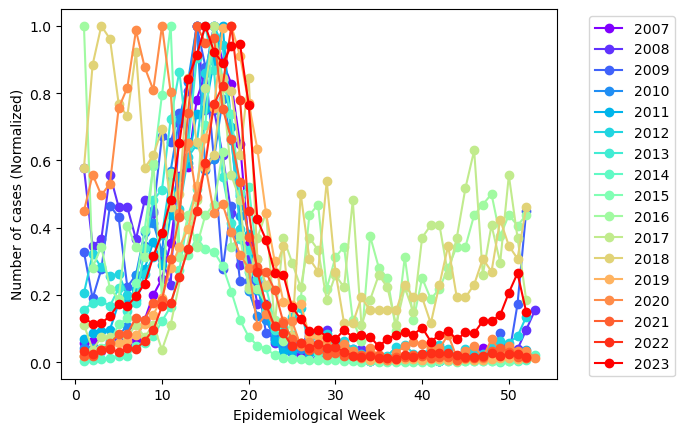

In [3]:
color = iter(cm.rainbow(np.linspace(0, 1, 17)))
i = 0
for year in np.unique(df['YEAR_PRI'])[7:]:
    c = next(color)
    df_tmp = df[df['YEAR_PRI'] == year]
    print(year,np.max(df_tmp['CASES']))
    plt.plot(df_tmp['WEEK_PRI'],df_tmp['CASES']/(np.max(df_tmp['CASES'])),'-o', color = c,label = str(year))
    i = i + 1
plt.legend(bbox_to_anchor=(1.05, 1.00))
plt.xlabel('Epidemiological Week')
plt.ylabel('Number of cases (Normalized)')
plt.show()

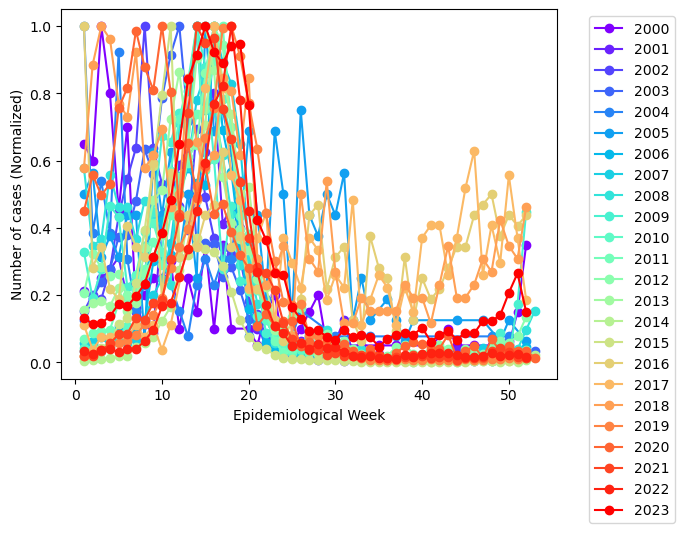

In [4]:
color = iter(cm.rainbow(np.linspace(0, 1, 24)))
i = 0
for year in np.unique(df['YEAR_PRI'])[0:]:
    c = next(color)
    df_tmp = df[df['YEAR_PRI'] == year]
    plt.plot(df_tmp['WEEK_PRI'],df_tmp['CASES']/(np.max(df_tmp['CASES'])),'-o', color = c,label = str(year))
    i = i + 1
plt.legend(bbox_to_anchor=(1.05, 1.00))
plt.xlabel('Epidemiological Week')
plt.ylabel('Number of cases (Normalized)')
plt.show()

## Plotting the time series - seasonal transmission - Rio de Janeiro

In [5]:
df = pd.read_csv('data/330455_total_new.csv', sep = ';')

2007 307
2008 3916
2009 69
2010 150
2011 5583
2012 3727
2013 2828
2014 35
2015 350
2016 354
2017 193
2018 236
2019 1359
2020 78
2021 50
2022 334
2023 993


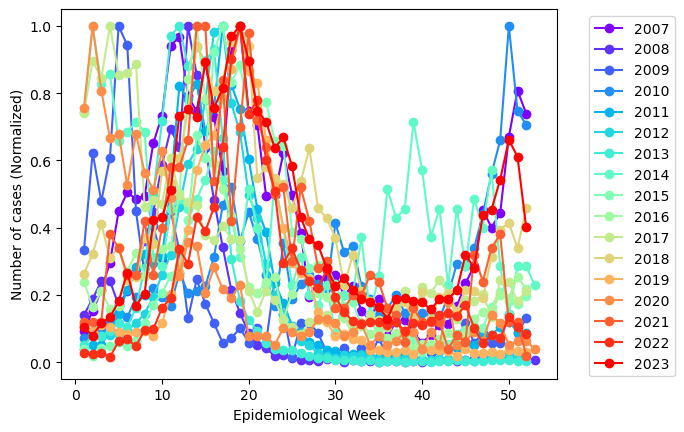

In [6]:
color = iter(cm.rainbow(np.linspace(0, 1, 17)))
i = 0
for year in np.unique(df['YEAR_PRI'])[7:]:
    c = next(color)
    df_tmp = df[df['YEAR_PRI'] == year]
    print(year,np.max(df_tmp['CASES']))
    plt.plot(df_tmp['WEEK_PRI'],df_tmp['CASES']/(np.max(df_tmp['CASES'])),'-o', color = c,label = str(year))
    i = i + 1
plt.legend(bbox_to_anchor=(1.05, 1.00))
plt.xlabel('Epidemiological Week')
plt.ylabel('Number of cases (Normalized)')
plt.show()

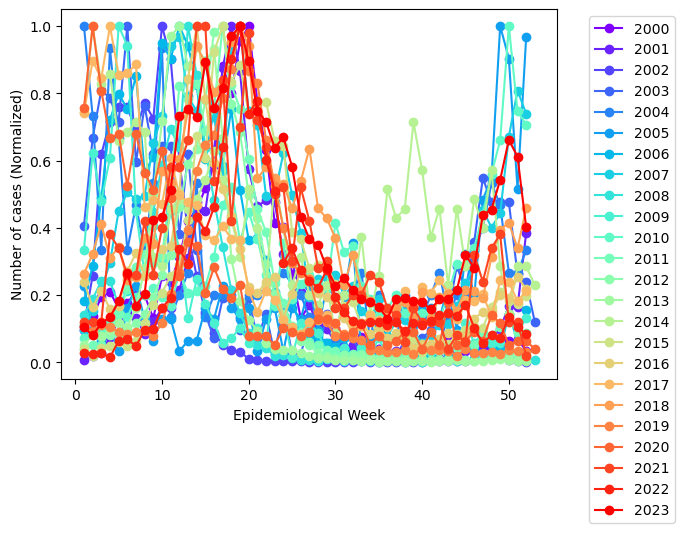

In [7]:
color = iter(cm.rainbow(np.linspace(0, 1, 24)))
i = 0
for year in np.unique(df['YEAR_PRI'])[0:]:
    c = next(color)
    df_tmp = df[df['YEAR_PRI'] == year]
    plt.plot(df_tmp['WEEK_PRI'],df_tmp['CASES']/(np.max(df_tmp['CASES'])),'-o', color = c,label = str(year))
    i = i + 1
plt.legend(bbox_to_anchor=(1.05, 1.00))
plt.xlabel('Epidemiological Week')
plt.ylabel('Number of cases (Normalized)')
plt.show()

## Population Pyramid - Sao Paulo

In [8]:
df_pop = pd.read_csv('original/pop_pyramid_355030.csv', sep = ';')

In [9]:
df_pop['Mean'] = df_pop.iloc[:, 1:].mean(axis=1)

In [10]:
df_pop[['Faixa Etaria 1','Mean']]

,Faixa Etaria 1,Mean
0,0 a 4 anos,7.930611e+05
1,5 a 9 anos,8.037736e+05
2,10 a 14 anos,8.364961e+05
3,15 a 19 anos,8.779707e+05
4,20 a 29 anos,1.960304e+06
5,30 a 39 anos,1.995085e+06
6,40 a 49 anos,1.666077e+06
7,50 a 59 anos,1.319655e+06
8,60 a 69 anos,8.781624e+05
9,70 a 79 anos,4.765384e+05


In [11]:
np.array(df_pop['Mean'])[:-1]

array([ 793061.06666667,  803773.6       ,  836496.06666667,
        877970.73333333, 1960304.2       , 1995084.66666667,
       1666076.86666667, 1319655.46666667,  878162.4       ,
        476538.4       ,  245667.66666667])

In [73]:
a = np.array(df_pop['Mean'])[:-1]

In [75]:
print('Infants: ', a[0]) # 0 to 4 years more or less 800.000
print('Children: ', a[1]+a[2]) # 5 to 14 years more or less 
print('Adolescents: ', a[3]) # 14 to 19 years
print('Adults: ', a[4]+a[5]+a[6]+a[7]+a[8]) # 20 to 70 years
print('Elderly: ', a[9]+a[10]) # 70+ years

Infants:  793061.0666666667
Children:  1640269.6666666665
Adolescents:  877970.7333333333
Adults:  7819283.600000001
Elderly:  722206.0666666667


## Death Rate - Sao Paulo

In [77]:
df_death = pd.read_csv('original/deaths_sp.csv', sep = ';')

In [78]:
df_death

,Municipio,Menor 1 ano,1 a 4 anos,5 a 9 anos,10 a 14 anos,15 a 19 anos,20 a 29 anos,30 a 39 anos,40 a 49 anos,50 a 59 anos,60 a 69 anos,70 a 79 anos,80 anos e mais,Idade ignorada,Total
0,355030 SAO PAULO,47322,7123,3702,4940,21638,60196,74923,123079,200043,272227,333485,463056,4190,1615924
1,Total,47322,7123,3702,4940,21638,60196,74923,123079,200043,272227,333485,463056,4190,1615924


In [80]:
333485+463056

796541